In [1]:
import sys
sys.path.append('/home/l_bechir/github/aare/build')

In [2]:
from _aare import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [3]:
import _aare
dir(_aare)

['Auto',
 'ChipTestBoard',
 'Cluster',
 'ClusterFileV2',
 'ClusterFinder',
 'ClusterHeader',
 'ClusterV2',
 'ClusterV2_',
 'DOUBLE',
 'DType',
 'DTypeIndex',
 'DetectorType',
 'ERROR',
 'Eiger',
 'FLOAT',
 'File',
 'FileConfig',
 'Frame',
 'INT16',
 'INT32',
 'INT64',
 'INT8',
 'Jungfrau',
 'Moench',
 'Mythen3',
 'NDArray_<i1_2',
 'NDArray_<i2_2',
 'NDArray_<i4_2',
 'NDArray_<i8_2',
 'NDArray_<u1_2',
 'NDArray_<u2_2',
 'NDArray_<u4_2',
 'NDArray_<u8_2',
 'NDArray_f4_2',
 'NDArray_f8_2',
 'NDView_<i1_2',
 'NDView_<i2_2',
 'NDView_<i4_2',
 'NDView_<i8_2',
 'NDView_<u1_2',
 'NDView_<u2_2',
 'NDView_<u4_2',
 'NDView_<u8_2',
 'NDView_f4_2',
 'NDView_f8_2',
 'Path',
 'Pedestal',
 'TimingMode',
 'Trigger',
 'UINT16',
 'UINT32',
 'UINT64',
 'UINT8',
 'Unknown',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'big',
 'endian',
 'little',
 'native',
 'sls_detector_header',
 'xy']

In [4]:
!pwd

/home/l_bechir/github/aare/src/python/example


In [5]:
file = File("../../../data/jungfrau/jungfrau_single_master_0.json")
file.rows(),file.cols(),file.bitdepth(),file.detector_type()

(512, 1024, 16, <DetectorType.Jungfrau: 0>)

In [6]:
frame = file.read()
frame.rows,frame.cols,frame.bitdepth

(512, 1024, 16)

In [7]:
frame.array()

array([[2123, 2852, 2821, ..., 3007, 3039, 2677],
       [2691, 3291, 3284, ..., 3246, 3189, 2960],
       [3062, 3222, 3080, ..., 3016, 3198, 2942],
       ...,
       [2679, 3041, 2709, ..., 3399, 3190, 3068],
       [2985, 3063, 2908, ..., 3211, 3231, 3137],
       [2326, 2480, 2893, ..., 2925, 3354, 3252]], dtype=uint16)

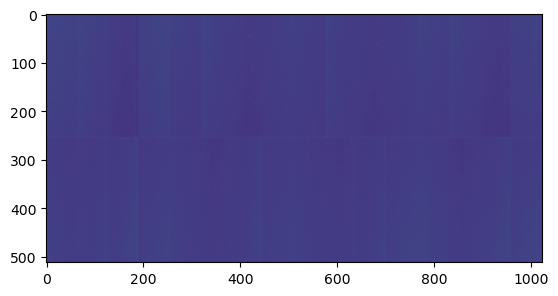

In [8]:
plt.imshow(frame.array())
plt.show()

In [9]:
file = File("/mnt/sls_det_storage/moench_data/testNewFW20230714/cu_half_speed_master_4.json")
file.rows(),file.cols(),file.detector_type()

(400, 400, <DetectorType.Moench: 3>)

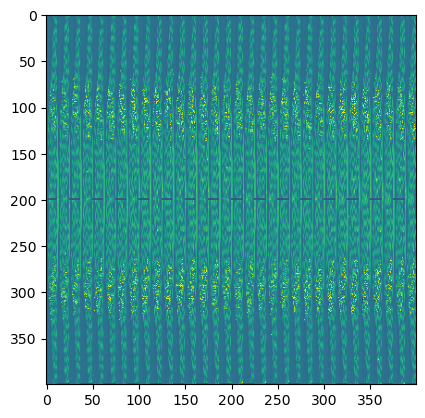

In [10]:
frame = file.read()
nparray = frame.array()
plt.imshow(nparray)
plt.show()

In [11]:
cluster_file = ClusterFileV2("/mnt/sls_det_storage/moench_data/testNewFW20230714/clust/cu_half_speed_d0_f0_4.clust",'r')
cluster_file.frame_number()

23389

In [12]:
cluster_file.frame_number()

23389

In [13]:
pedestal = Pedestal(file.rows(),file.cols())

In [14]:
for i in range(1000):
    frame = file.iread(i)
    pedestal.push(frame)
    

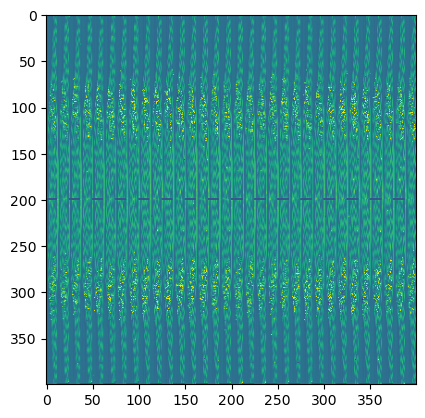

In [15]:
ndarray = pedestal.mean()
plt.imshow(np.array(ndarray))
plt.show()

In [16]:
pedestal.mean()[0,0], file.iread(0).array()[0,0]

(6579.468, 6530)

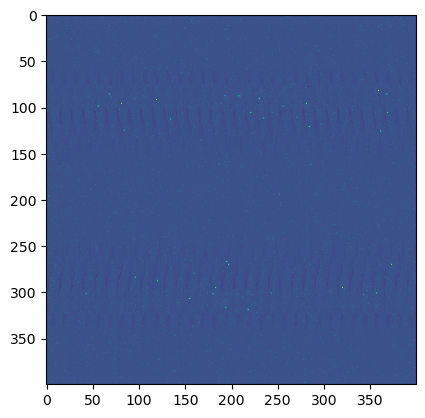

In [17]:
denoised_array = file.iread(0).array()-np.array(pedestal.mean())
plt.imshow(denoised_array)
plt.show()

In [18]:
cluster_finder = ClusterFinder(3,3,1.0,1.0)

In [19]:
denoised_array


array([[ -49.468,  -81.446,   40.296, ...,   57.839,   15.334,   33.366],
       [  63.312,  -72.574,  -45.034, ...,  -76.101,   17.426,  -87.621],
       [-153.224,   40.627,  -30.174, ...,   61.111,  -67.084,   60.718],
       ...,
       [  24.053,   28.464,  -14.007, ...,   -5.916,  -61.732,   57.772],
       [  55.556,  -63.915,  -51.769, ...,   13.804,  177.874,  246.405],
       [ 100.179,  113.174,   88.641, ...,   12.627,   53.303,   82.739]])

In [20]:
clusters = cluster_finder.find_clusters_without_threshold(denoised_array,pedestal)
# for cluster in clusters:
#     print(np.array(cluster.data(),np.uint32))
clusters

[<Cluster: x: 359, y: 82, size: 72>,
 <Cluster: x: 208, y: 88, size: 72>,
 <Cluster: x: 119, y: 92, size: 72>,
 <Cluster: x: 81, y: 96, size: 72>,
 <Cluster: x: 56, y: 99, size: 72>,
 <Cluster: x: 221, y: 106, size: 72>,
 <Cluster: x: 235, y: 112, size: 72>,
 <Cluster: x: 284, y: 121, size: 72>,
 <Cluster: x: 361, y: 126, size: 72>,
 <Cluster: x: 195, y: 267, size: 72>,
 <Cluster: x: 197, y: 270, size: 72>,
 <Cluster: x: 373, y: 270, size: 72>,
 <Cluster: x: 96, y: 284, size: 72>,
 <Cluster: x: 120, y: 288, size: 72>,
 <Cluster: x: 183, y: 295, size: 72>,
 <Cluster: x: 320, y: 295, size: 72>,
 <Cluster: x: 357, y: 301, size: 72>,
 <Cluster: x: 180, y: 302, size: 72>,
 <Cluster: x: 155, y: 307, size: 72>,
 <Cluster: x: 194, y: 317, size: 72>,
 <Cluster: x: 218, y: 319, size: 72>]

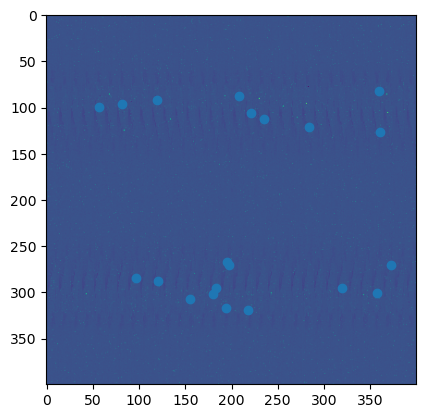

In [21]:
plt.imshow(denoised_array)
x_arr,y_arr=[],[]
for cluster in clusters:
    x_arr.append(cluster.x)
    y_arr.append(cluster.y)
plt.scatter(x_arr,y_arr)